In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import sys
sys.path.insert(0,'/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert')
sys.path.insert(0,'/Users/megret/Documents/Research/BeeTracking/Soft/apriltag/swatbotics-apriltag/python/')
from labelbeeconvert import labelbee_convert as lb

In [7]:
cd '/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert/data/drive-download-20181001'

/Users/megret/Documents/Research/BeeTracking/Soft/labelbeeconvert/data/drive-download-20181001


In [8]:
ls

C02_170620070000-Tracks-20180802_141631 - Ivan D Collado Hernandez.json*
C02_170620080000-Tracks-20180922_161322 - Patricia A Arsuaga Hernandez.json*
C02_170620090000-Tracks-20180801_150419 - Edwin M Caraballo Sanchez.json*
C02_170620100000-Tracks-20180731_163951 - Edwin J Rivera Colon.json*
C02_170620110000-Tracks-20180731_005651-Luis S. Gonzalez - Luis Gonzalez Medina.json*
C02_170620120000-Tracks-20180730_150118 - Isada Claudio Ford.json*
C02_170620130000-Tracks-20180730_213708 - Ivan D Collado Hernandez.json*
C02_170620150000-Tracks-20180731_103723 - Patricia A Arsuaga Hernandez.json*
C02_170620160000-Tracks-20180615_130945 - Jhoniel Perez Perez.json*
C02_170620170000-Tracks-20180901_222052 - Edwin M Caraballo Sanchez.json*
C02_170620180000-Tracks-20180801_104539 - Edwin J Rivera Colon.json*
C02_170621070000-Tracks-20180918_105028 - Claudia Sofia Cordero Martinez.json*
C02_170621080000-Tracks-20180922_150626 - Claudia Sofia Cordero Martinez.json*
C02_170621090000-Tracks-20180926_11

In [16]:
#evts=lb.load_fileset('../inputlist_new.csv','drive-download-20181001')
evts=lb.load_fileset('../inputlist.csv','drive-download-20181001')

Loading C02_170620080000-Tracks-20180922_161322 - Patricia A Arsuaga Hernandez.json...
Loading C02_170620090000-Tracks-20180801_150419 - Edwin M Caraballo Sanchez.json...
Loading C02_170620100000-Tracks-20180731_163951 - Edwin J Rivera Colon.json...
Loading C02_170620110000-Tracks-20180731_005651-Luis S. Gonzalez - Luis Gonzalez Medina.json...
Loading C02_170620120000-Tracks-20180730_150118 - Isada Claudio Ford.json...
Loading C02_170620130000-Tracks-20180730_213708 - Ivan D Collado Hernandez.json...
Loading C02_170620150000-Tracks-20180731_103723 - Patricia A Arsuaga Hernandez.json...
Loading C02_170620160000-Tracks-20180615_130945 - Jhoniel Perez Perez.json...
Loading C02_170620170000-Tracks-20180901_222052 - Edwin M Caraballo Sanchez.json...
Loading C02_170620180000-Tracks-20180801_104539 - Edwin J Rivera Colon.json...
Loading C02_170621070000-Tracks-20180918_105028 - Claudia Sofia Cordero Martinez.json...
Loading C02_170621080000-Tracks-20180922_150626 - Claudia Sofia Cordero Marti

In [141]:
E = evts[['video', 'datetime', 'date', 'time', 'frame', 'id', 'labels', 'leaving', 'entering', 'pollen', 'walking',
             'fanning', 'falsealarm', 'wrongid' ]].copy()
E = E.query('falsealarm!=True & wrongid!=True').copy()
cols=['leaving','entering','pollen','walking','fanning','falsealarm','wrongid']
E[cols]=E[cols].astype('int')
E=E.drop(['falsealarm', 'wrongid'], axis=1)
E

,video,datetime,date,time,frame,id,labels,leaving,entering,pollen,walking,fanning
4,C02_170620080000,2017-06-20 08:00:26.250,2017-06-20,08:00:26.250000,525,183,,0,0,0,0,0
30,C02_170620080000,2017-06-20 08:09:27.950,2017-06-20,08:09:27.950000,11359,197,entering,0,1,0,0,0
31,C02_170620080000,2017-06-20 08:09:27.950,2017-06-20,08:09:27.950000,11359,661,entering,0,1,0,0,0
32,C02_170620080000,2017-06-20 08:09:28.100,2017-06-20,08:09:28.100000,11362,1014,entering,0,1,0,0,0
34,C02_170620080000,2017-06-20 08:10:39.500,2017-06-20,08:10:39.500000,12790,1652,entering,0,1,0,0,0
35,C02_170620080000,2017-06-20 08:10:59.350,2017-06-20,08:10:59.350000,13187,1109,"entering,pollen",0,1,1,0,0
36,C02_170620080000,2017-06-20 08:11:52.750,2017-06-20,08:11:52.750000,14255,2238,entering,0,1,0,0,0
37,C02_170620080000,2017-06-20 08:11:52.800,2017-06-20,08:11:52.800000,14256,436,entering,0,1,0,0,0
38,C02_170620080000,2017-06-20 08:11:52.900,2017-06-20,08:11:52.900000,14258,1361,entering,0,1,0,0,0
40,C02_170620080000,2017-06-20 08:12:02.150,2017-06-20,08:12:02.150000,14443,1361,entering,0,1,0,0,0


In [124]:
evts.to_csv('../170620-170627.csv')

In [21]:
cols=['leaving','entering','pollen','walking','fanning','falsealarm','wrongid']
evts[cols]=evts[cols].astype('bool')
evts

,frame,id,labels,leaving,entering,pollen,walking,fanning,falsealarm,wrongid,datetime,date,time,video
0,1,371,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:00.050,2017-06-20,08:00:00.050000,C02_170620080000
1,5,15,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:00.250,2017-06-20,08:00:00.250000,C02_170620080000
2,224,1275,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:11.200,2017-06-20,08:00:11.200000,C02_170620080000
3,233,425,wrongid,False,False,False,False,False,False,True,2017-06-20 08:00:11.650,2017-06-20,08:00:11.650000,C02_170620080000
4,525,183,,False,False,False,False,False,False,False,2017-06-20 08:00:26.250,2017-06-20,08:00:26.250000,C02_170620080000
5,1908,1086,wrongid,False,False,False,False,False,False,True,2017-06-20 08:01:35.400,2017-06-20,08:01:35.400000,C02_170620080000
6,2136,1498,falsealarm,False,False,False,False,False,True,False,2017-06-20 08:01:46.800,2017-06-20,08:01:46.800000,C02_170620080000
7,2356,265,wrongid,False,False,False,False,False,False,True,2017-06-20 08:01:57.800,2017-06-20,08:01:57.800000,C02_170620080000
8,3186,1178,wrongid,False,False,False,False,False,False,True,2017-06-20 08:02:39.300,2017-06-20,08:02:39.300000,C02_170620080000
9,5238,1138,wrongid,False,False,False,False,False,False,True,2017-06-20 08:04:21.900,2017-06-20,08:04:21.900000,C02_170620080000


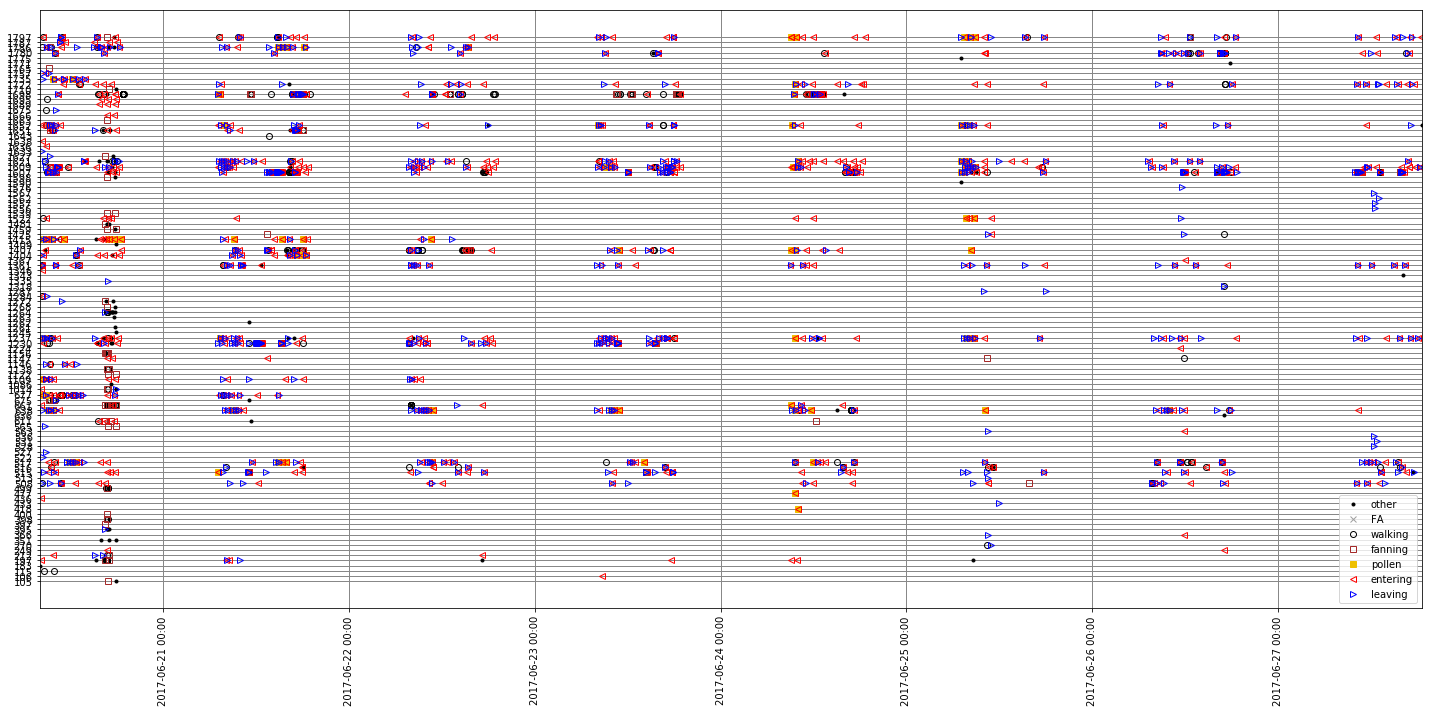

In [68]:
fig = plt.subplots(1,1,figsize=(20,10))
#plt.plot(evts['frame'],evts['id'],'o')
evts_val = evts.query('falsealarm!=True & wrongid!=True & id<1800 &id>90 & not(id>700 & id<1000)').copy()
evts_val.index = range(evts_val.shape[0])
evts_val.reindex()
lb.plot_activities(evts_val);
plt.tight_layout();

In [23]:
#evts

In [33]:
ids = evts_val['id'].unique()
len(ids)

106

In [69]:
#evts_val.set_index('datetime', drop=False, inplace=True)
#d=evts_val.groupby(['id',pd.Grouper(freq='1h')]).count()
d = evts_val.copy()

In [70]:
dates=pd.date_range('2017-06-20', periods=8*24, freq='1H')

In [93]:
c=d['id'].astype('category').cat

In [101]:
#d=d.reset_index()
#times = e['datetime'].unique()
ids = d['id'].unique()

d['k'] = d['id'].astype('category').cat.codes
d['l'] = pd.cut(d['datetime'],dates,labels=range(len(dates)-1)).astype('int')
#e.plot.line('datetime','id',style='.')
import seaborn as sns
plt.figure(figsize=(12,12))

A=np.zeros((len(ids),len(dates)))
for _,item in d.iterrows():
    A[item['k'],item['l']]=1
A

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

<Figure size 864x864 with 0 Axes>

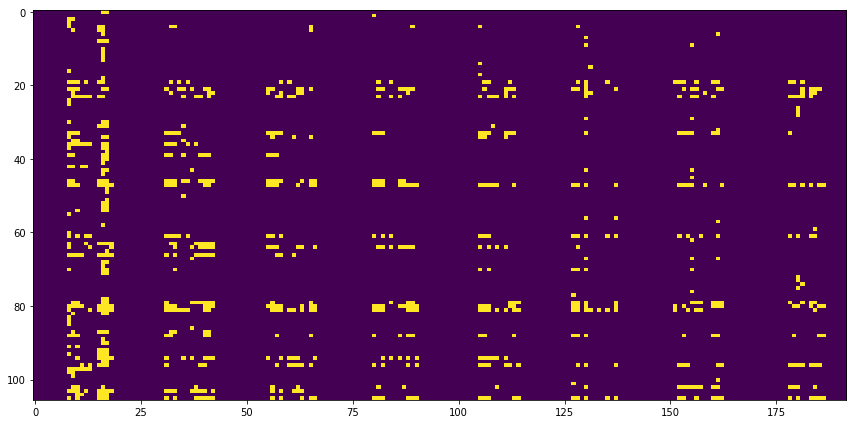

In [102]:
plt.figure(figsize=(12,6))
plt.imshow(A)
plt.axis('auto')
plt.tight_layout()

In [103]:
N=A.shape[0]
B=A.reshape((N,8,24))

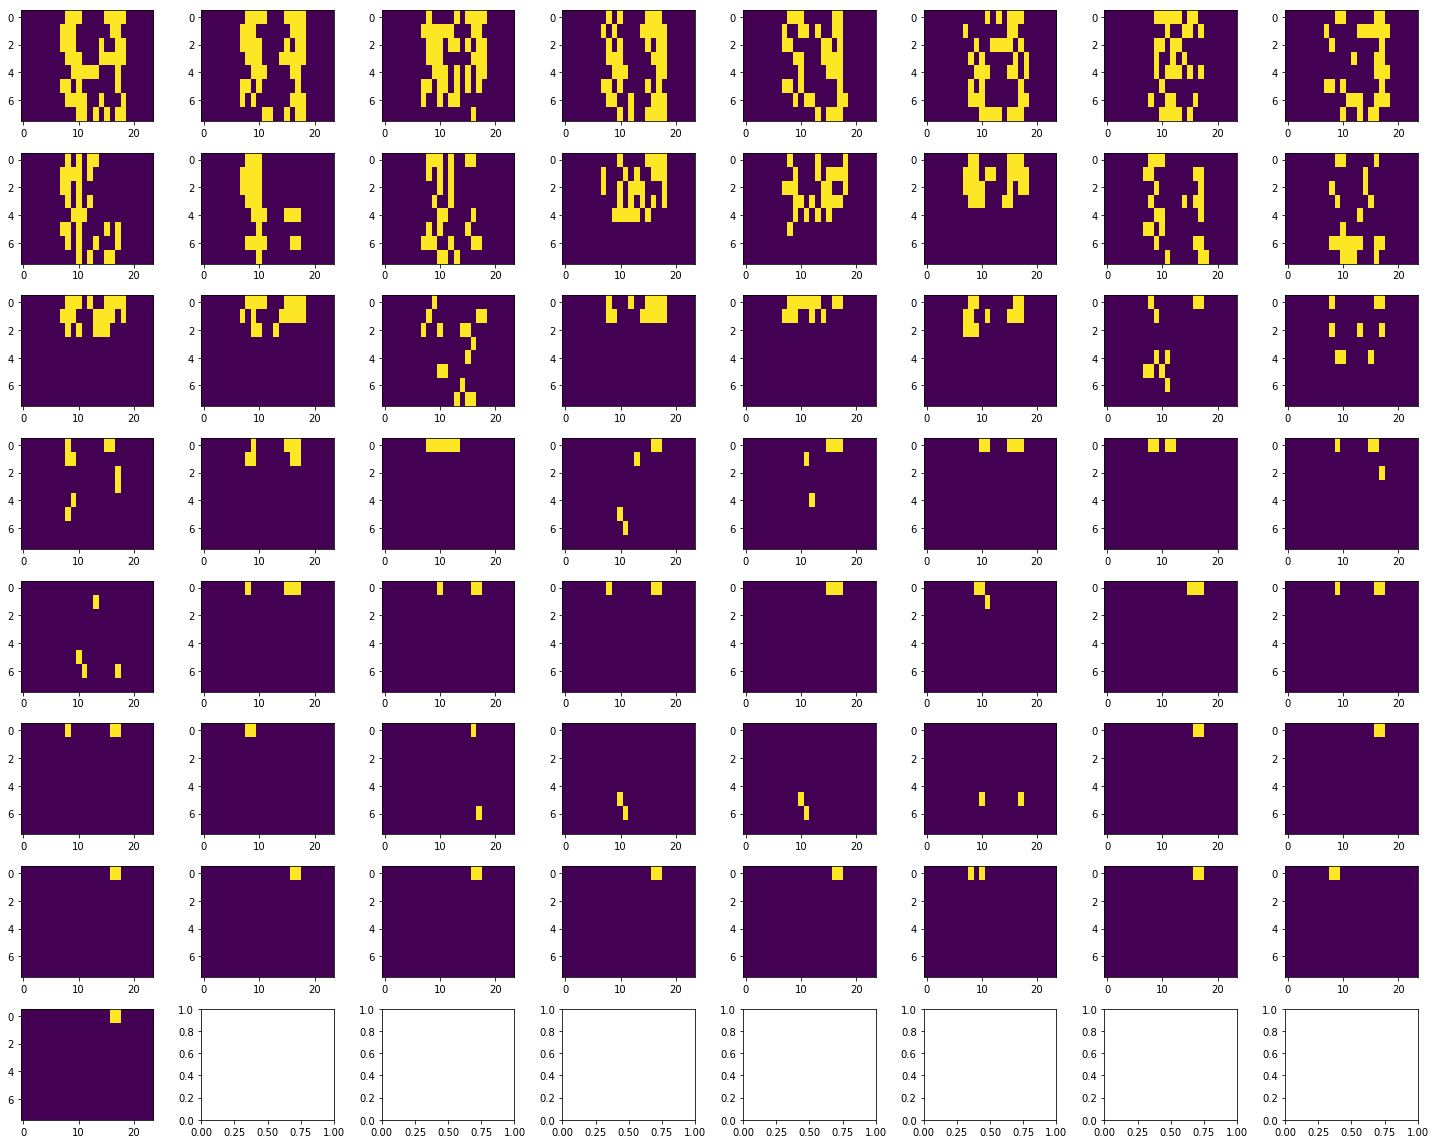

In [123]:
ks=[]
c=[]
for i,b in enumerate(B):
    if (sum(b.ravel())>1): 
        ks.append(i)
        c.append(sum(b.ravel()))
kk=np.argsort(np.array(c))
kk=kk[::-1]
ks=np.array(ks)

nx=8
fig,ax=plt.subplots((len(ks)+nx-1)//nx,nx,figsize=(20,16))
ax=ax.ravel()
for i,k in enumerate(ks[kk]):
    b=B[k]
    plt.sca(ax[i])
    plt.imshow(b)
    plt.axis('auto')
plt.tight_layout()